In [1]:
%pylab inline
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mticker

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
def readf(file):
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [4]:
def filt(arr):
    State = arr[:,11]
    ap = where(State == 'Alive')[0][:] 
    return ap

In [5]:
def collector(arr,ap):
    Idx = arr[ap,0]
    Turn = arr[ap,1]
    x = append('x',arr[ap,2])
    px = append('px',arr[ap,3])
    y = append('y ',arr[ap,4])
    py = append('py',arr[ap,5])
    z = append('z',arr[ap,6])
    pz = append('pz',arr[ap,7])
    sx = append('sx',arr[ap,8])
    sy = append('sy',arr[ap,9])
    sz = append('sz',arr[ap,10])
    return Idx, Turn, x, px, y, py, z, pz, sx, sy, sz

In [6]:
def DF(file):
    df = pd.read_fwf(file)
    #pd.set_option('display.max_rows', None)
    display(df)

In [7]:
def stats(file):
    df = pd.read_fwf(file)
    display(df.describe(percentiles=[0.05,0.995]))

In [8]:
def deci2d(x,y):
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda y,pos : "${}$".format(f._formatSciNotation('%1.10e' % y))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))

In [9]:
def deci3d(x,y,z):
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda y,pos : "${}$".format(f._formatSciNotation('%1.10e' % y))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda z,pos : "${}$".format(f._formatSciNotation('%1.10e' % z))
    plt.gca().zaxis.set_major_formatter(mticker.FuncFormatter(g))

In [10]:
def d2plot(x,y,lp,up):
    ubx = percentile(x[1:], up)*1.1
    lbx = percentile(x[1:], lp)*1.1
    uby = percentile(y[1:], up)*1.1
    lby = percentile(y[1:], lp)*1.1
    
    figure(figsize=(9, 7))
    
    plot(x[1:],y[1:],'b.')
    xlabel('%s'%x[0],size =20)
    ylabel('%s'%y[0],size =20)
    xlim([lbx,ubx])
    ylim([lby, uby])
    #title('%s vs %s'%(y[0],x[0]),size =20)
    deci2d(x[1:],y[1:])
    show()

In [11]:
def pt(x):
    print('<%s>= %s '%(x[0],mean(x[1:])))
    print('sig_%s= %s '%(x[0],std(x[1:])))

In [12]:
def spt(sx):
    print('<%s>= %s '%(sx[0],mean(sx[1:])))

In [13]:
def d3plot(z,x,y,Turn,lp,up):
    ubz = percentile(z[1:], up)*1.1
    lbz = percentile(z[1:], lp)*1.1
    ubx = percentile(x[1:], up)*1.1
    lbx = percentile(x[1:], lp)*1.1
    uby = percentile(y[1:], up)*1.1
    lby = percentile(y[1:], lp)*1.1
    fig = figure(figsize=(13,11))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(z[1:], x[1:], y[1:], c='blue', marker='.') 

    ax.set_xlim([lbz,ubz])
    ax.set_ylim([lbx, ubx])
    ax.set_zlim([lby, uby])
    
    deci3d(z[1:],x[1:],y[1:])
    
    ax.set_title('Spatial displacement of particles after runing %s turns in the Ring'%Turn[0],fontsize=20)
    ax.set_xlabel('Z',fontsize=15)
    ax.set_ylabel('X',fontsize=15)
    ax.set_zlabel('Y',fontsize=15)
    show()

In [14]:
def key(file):
    k = []
    for i in range(len(file)):
        k.append(file[i])
    k = array(k)
    k1 = where(k == '-')[0][0]+1
    k2 = where(k == '-')[0][1]
    size = int(float(file[k1:k2]))
    return size

In [15]:
def tp(file,lp,up):

    size = key(file)
    arr = readf(file)
    ap = filt(arr)
    Idx, Turn, x, px, y, py, z, pz, sx, sy, sz = collector(arr,ap)
        
    d2plot(x,y,lp,up)
    d2plot(x,px,lp,up)
    d2plot(y,py,lp,up)
    d2plot(z,pz,lp,up)
    
    print('number of alive particles: %s / %s'%(len(ap),size))
    print(' ')
    print(' ')
    pt(x)
    pt(px)
    print(' ')
    print(' ')
    pt(y)
    pt(py)
    print(' ')
    print(' ')
    pt(z)
    pt(pz)
    print(' ')
    print(' ')
    spt(sx)
    spt(sy)
    spt(sz)

    d3plot(z,x,y,Turn,lp,up)


In [16]:
DF('rot-100-9400.txt')

,Ix,Turn,x,px,y,py,z,pz,spin_x,spin_y,spin_z,State
0,1,9400,0.000011,-0.000096,1.693718e-06,0.000304,0.018970,0.000711,0.037231,0.038756,0.998555,Alive
1,2,9400,-0.000007,-0.000057,-1.033113e-06,-0.000556,0.022308,-0.000222,0.001201,0.024974,0.999687,Alive
2,4,9400,-0.000015,-0.000130,1.639343e-06,0.000941,0.016088,0.000703,0.122973,-0.056817,0.990782,Alive
3,6,9400,-0.000028,0.000127,-4.258880e-07,-0.000432,0.013423,0.000194,0.097741,-0.005175,0.995198,Alive
4,7,9400,-0.000024,0.000035,-6.079358e-09,-0.000051,0.017861,-0.000022,0.022514,0.001078,0.999746,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...
56,95,9400,-0.000016,-0.000472,-5.226490e-06,-0.002613,0.029576,0.000354,0.036114,0.007433,0.999320,Alive
57,97,9400,-0.000003,0.000090,3.206724e-07,0.000016,0.008856,0.001301,0.005862,0.014085,0.999884,Alive
58,98,9400,0.000005,-0.000194,7.121595e-08,0.000274,0.022730,0.000382,-0.008131,-0.004463,0.999957,Alive
59,99,9400,0.000023,0.000303,-2.179723e-07,0.000041,0.011782,0.000072,0.052506,0.014486,0.998516,Alive


<IPython.core.display.Javascript object>


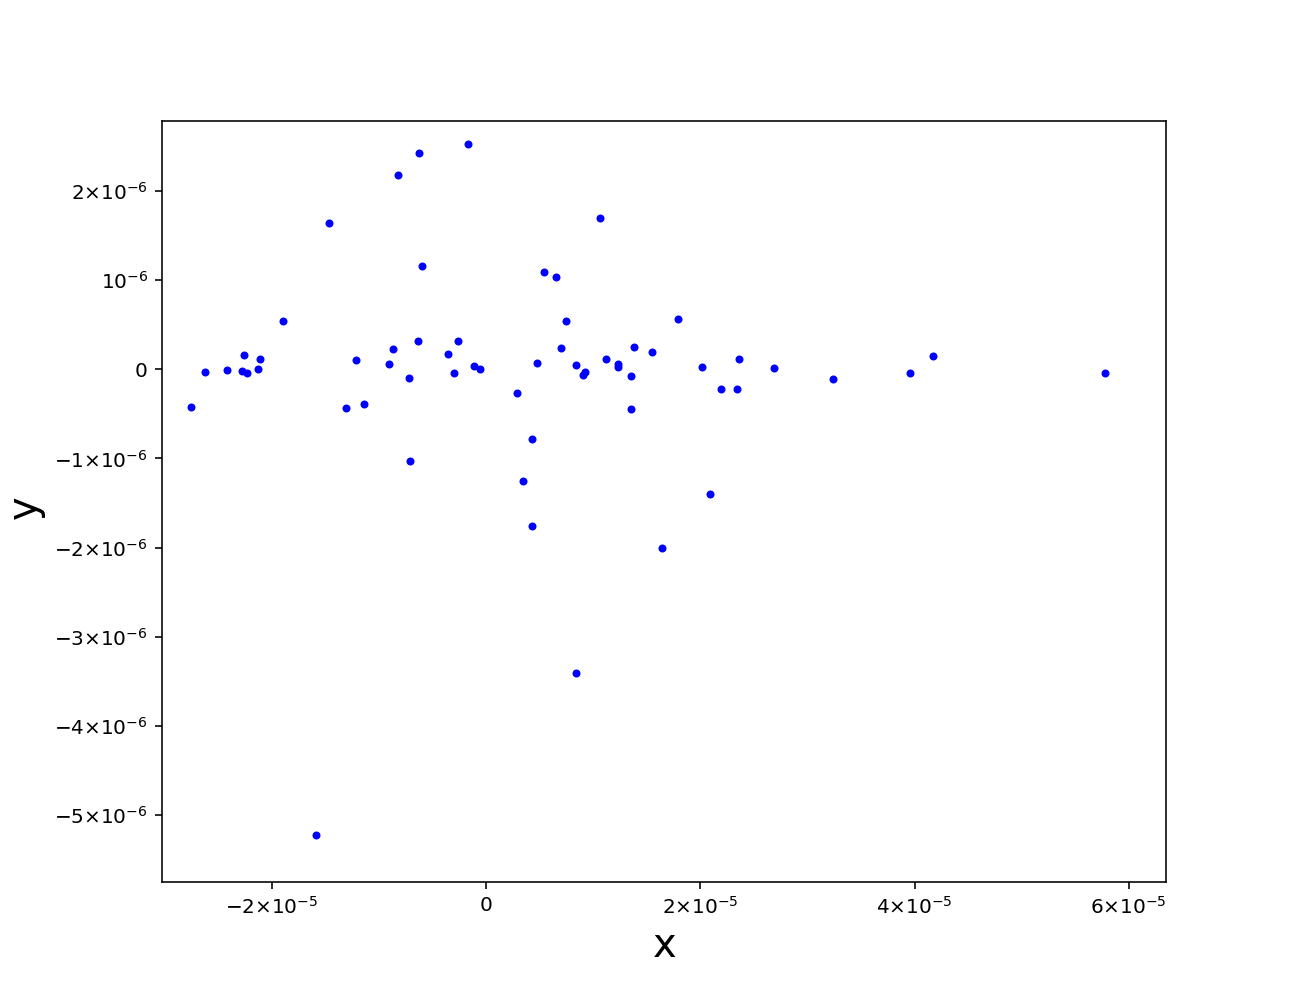

<IPython.core.display.Javascript object>


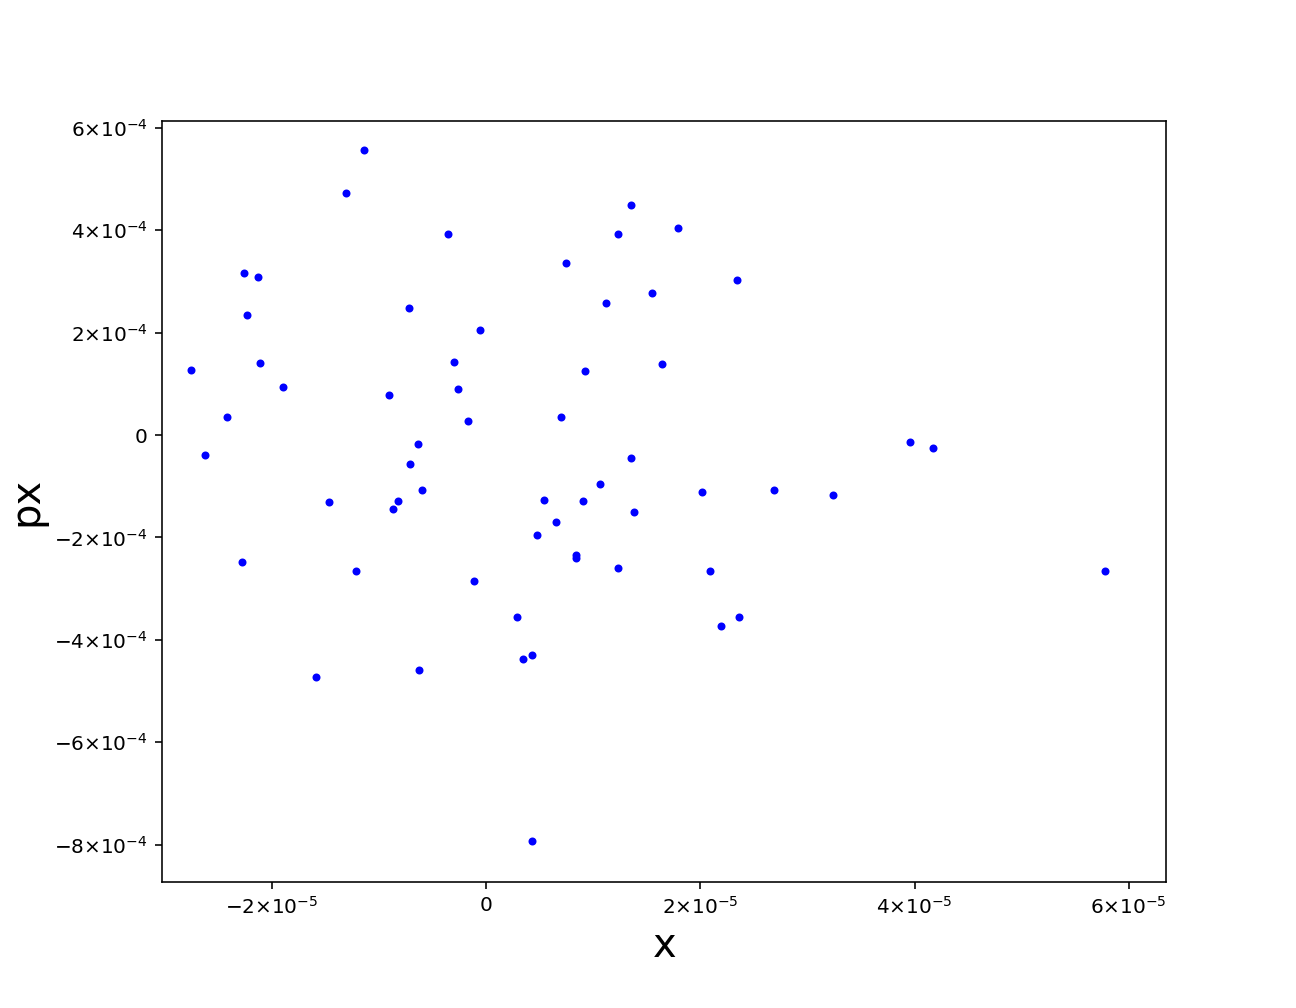

<IPython.core.display.Javascript object>


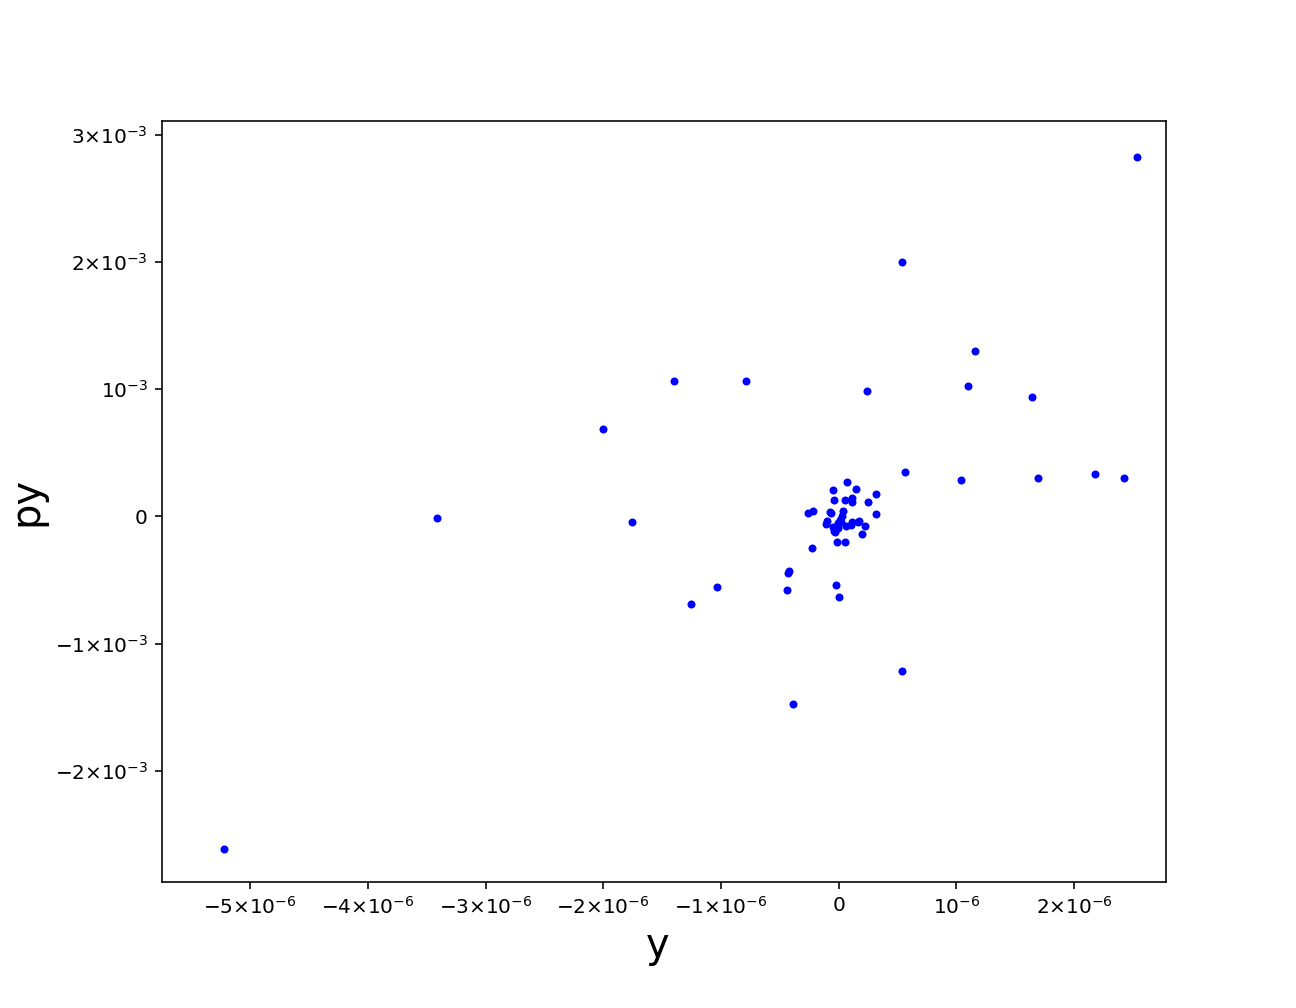

<IPython.core.display.Javascript object>


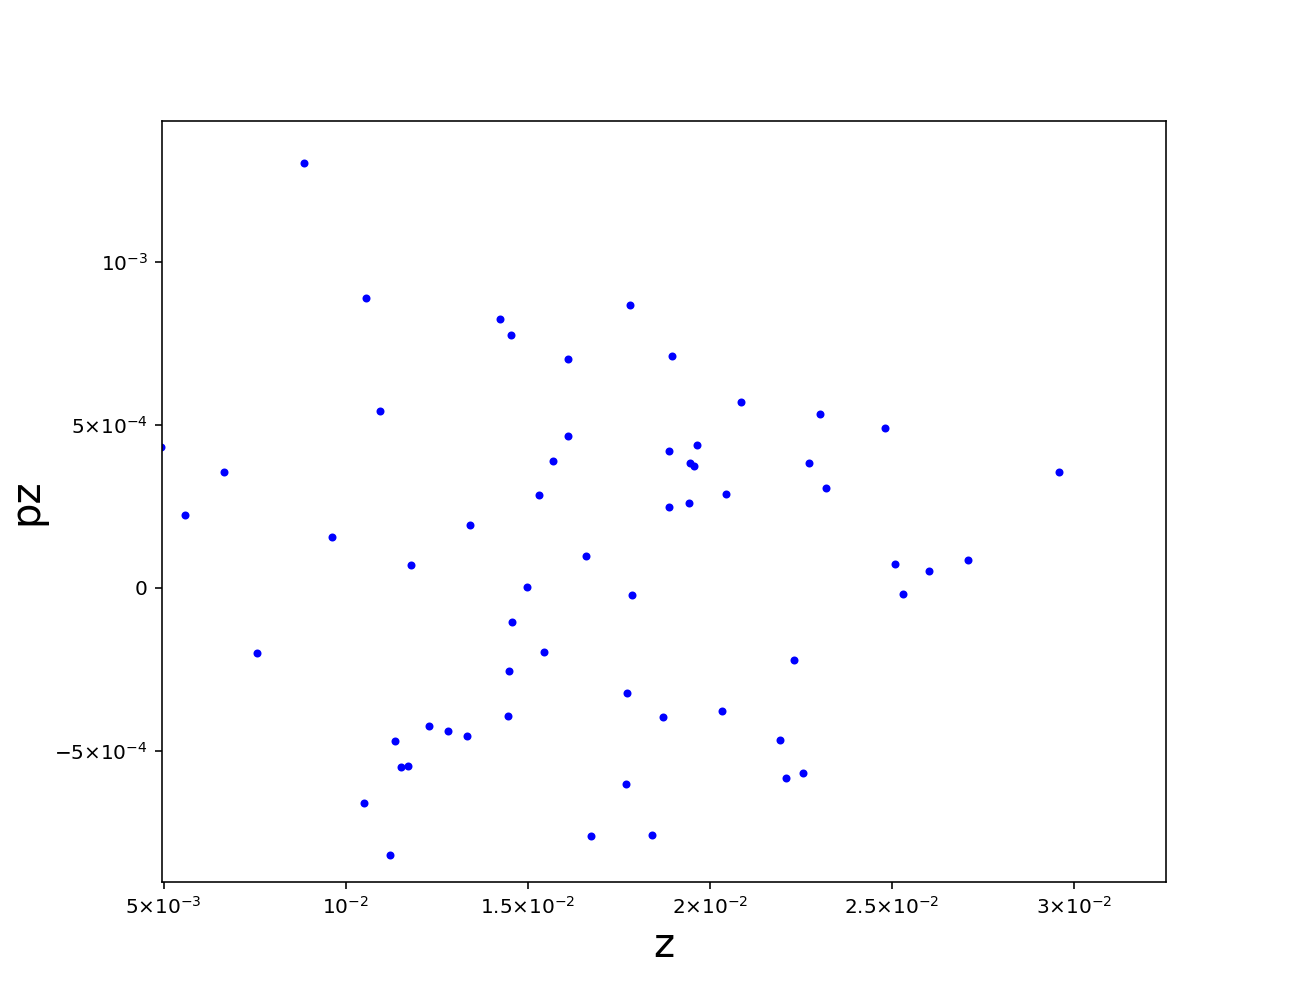

number of alive particles: 61 / 100
 
 
<x>= 2.963092280688524e-06 
sig_x= 1.765007335510729e-05 
<px>= -2.3858583227868853e-05 
sig_px= 0.0002746156184790417 
 
 
<y >= -2.7180253807213115e-08 
sig_y = 1.1438540131366077e-06 
<py>= 6.790973401149188e-05 
sig_py= 0.0007324551690321973 
 
 
<z>= 0.016535120568524592 
sig_z= 0.005656423332888863 
<pz>= 6.373147375836064e-05 
sig_pz= 0.00048267429366758325 
 
 
<sx>= 0.019705524590163934 
<sy>= 0.011161688524590164 
<sz>= 0.9984783442622951 


<IPython.core.display.Javascript object>


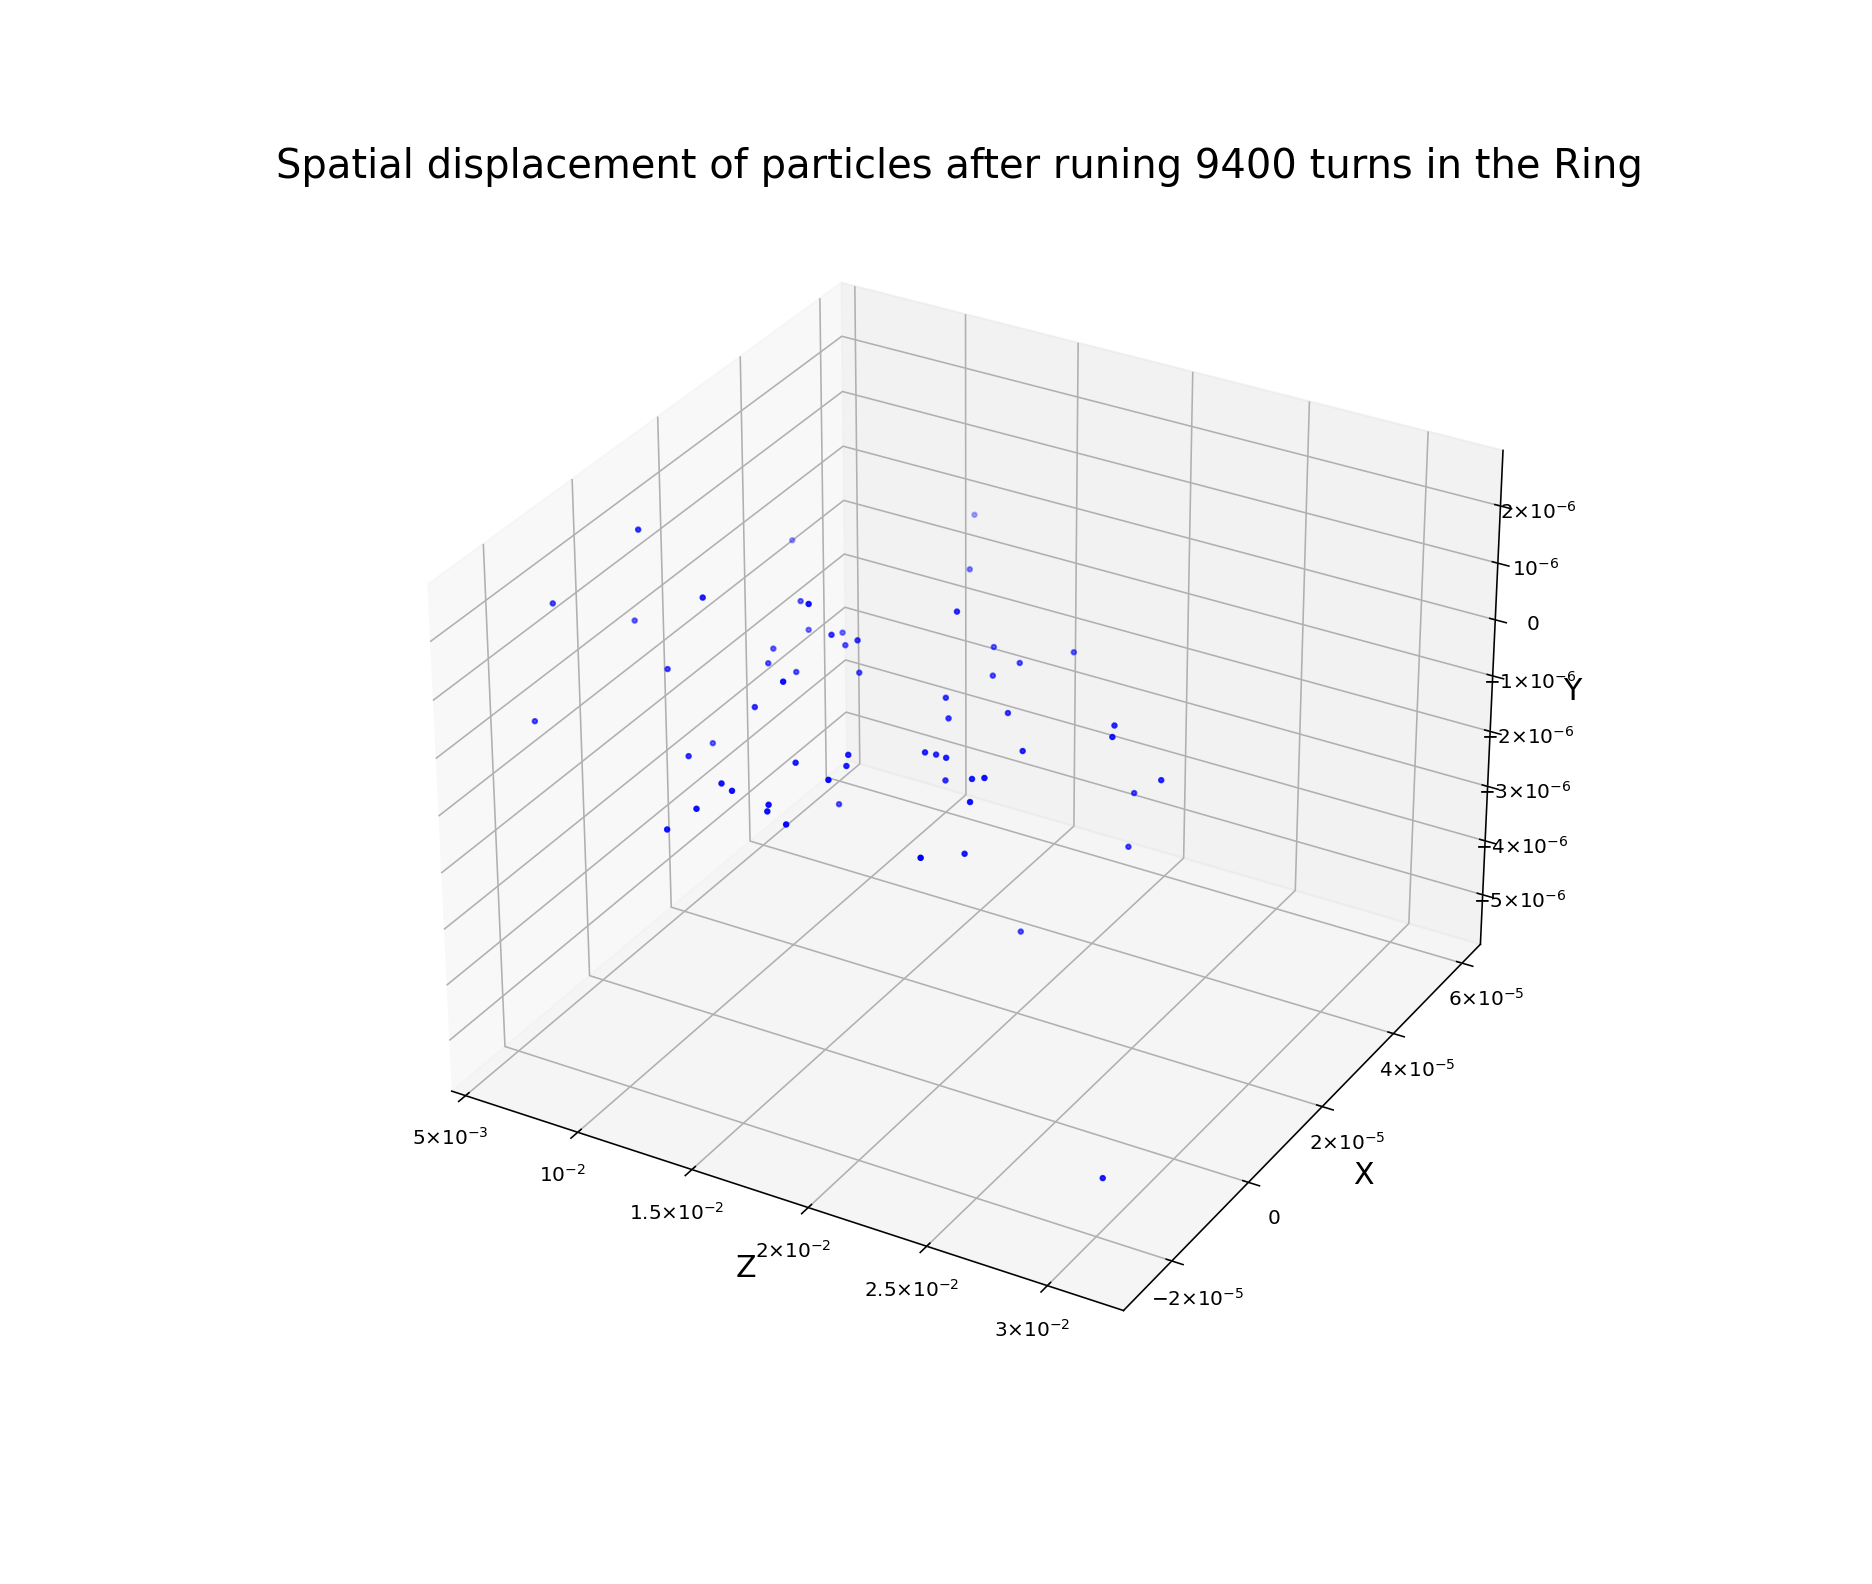

In [17]:
tp('rot-100-9400.txt', 0, 100) 

<IPython.core.display.Javascript object>


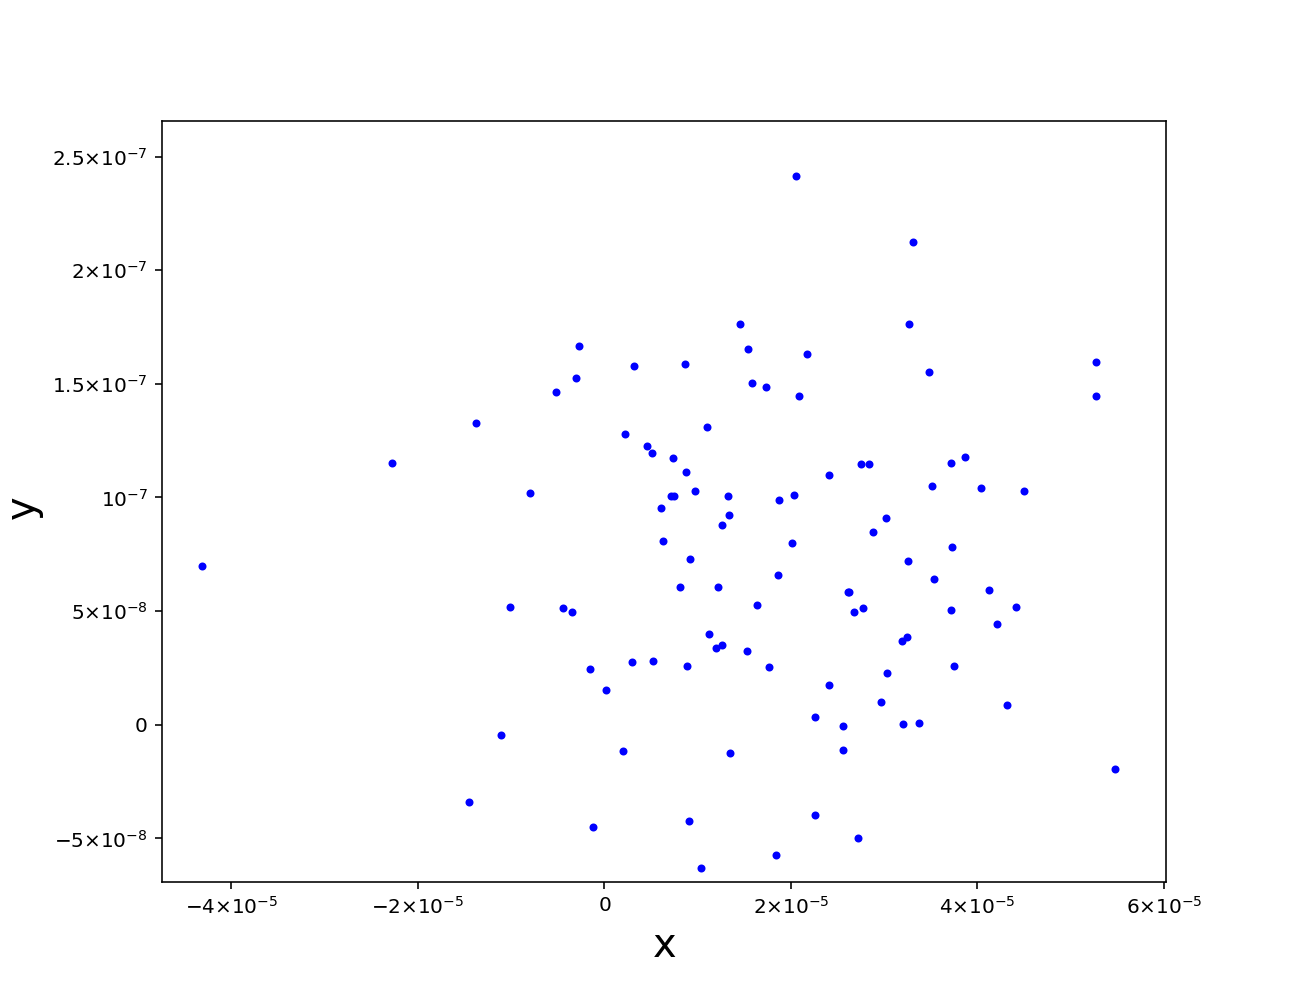

<IPython.core.display.Javascript object>


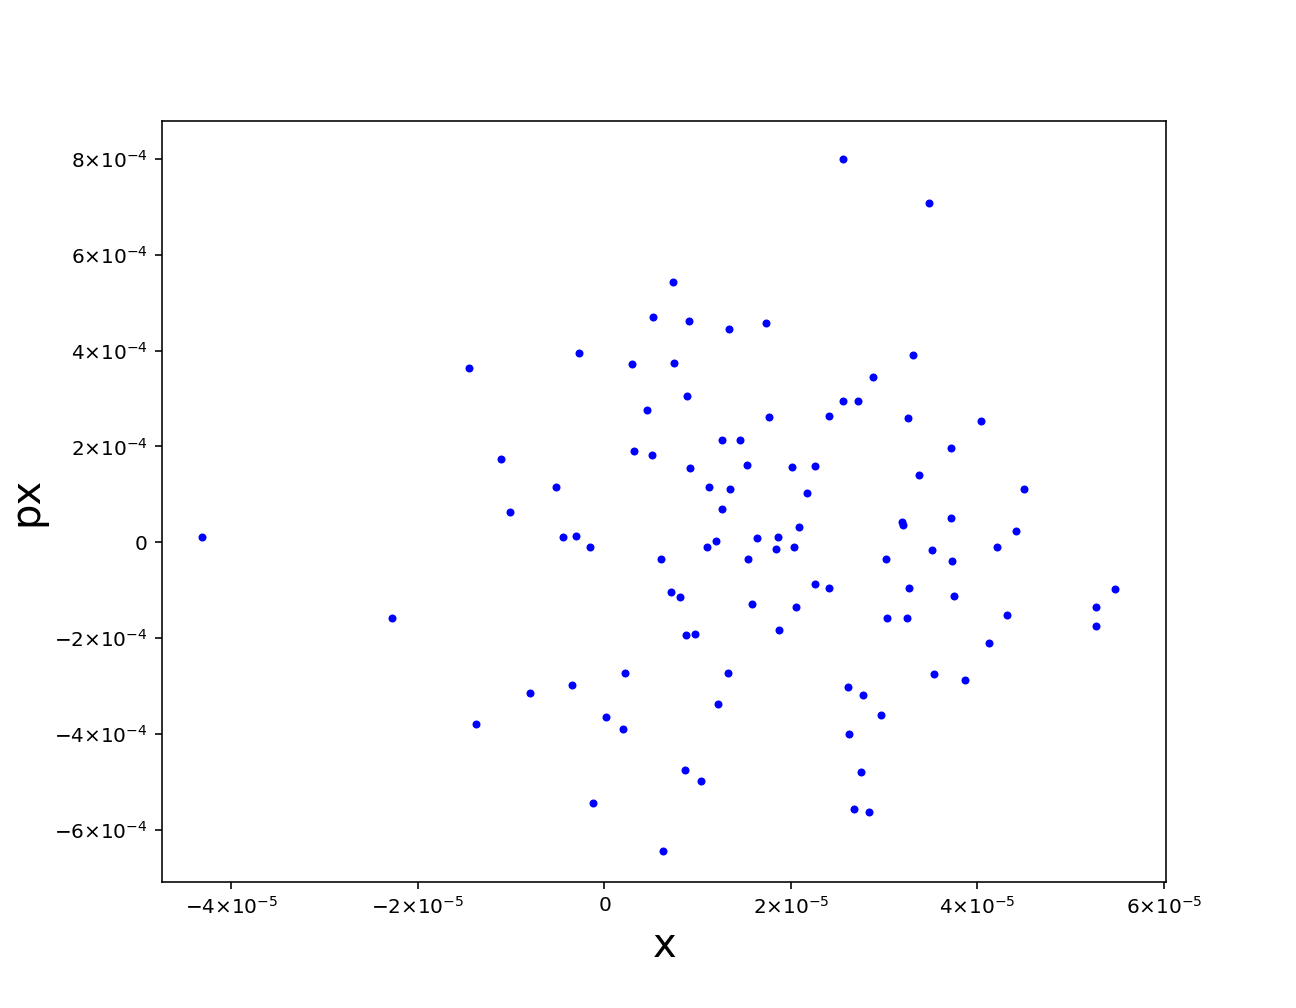

<IPython.core.display.Javascript object>


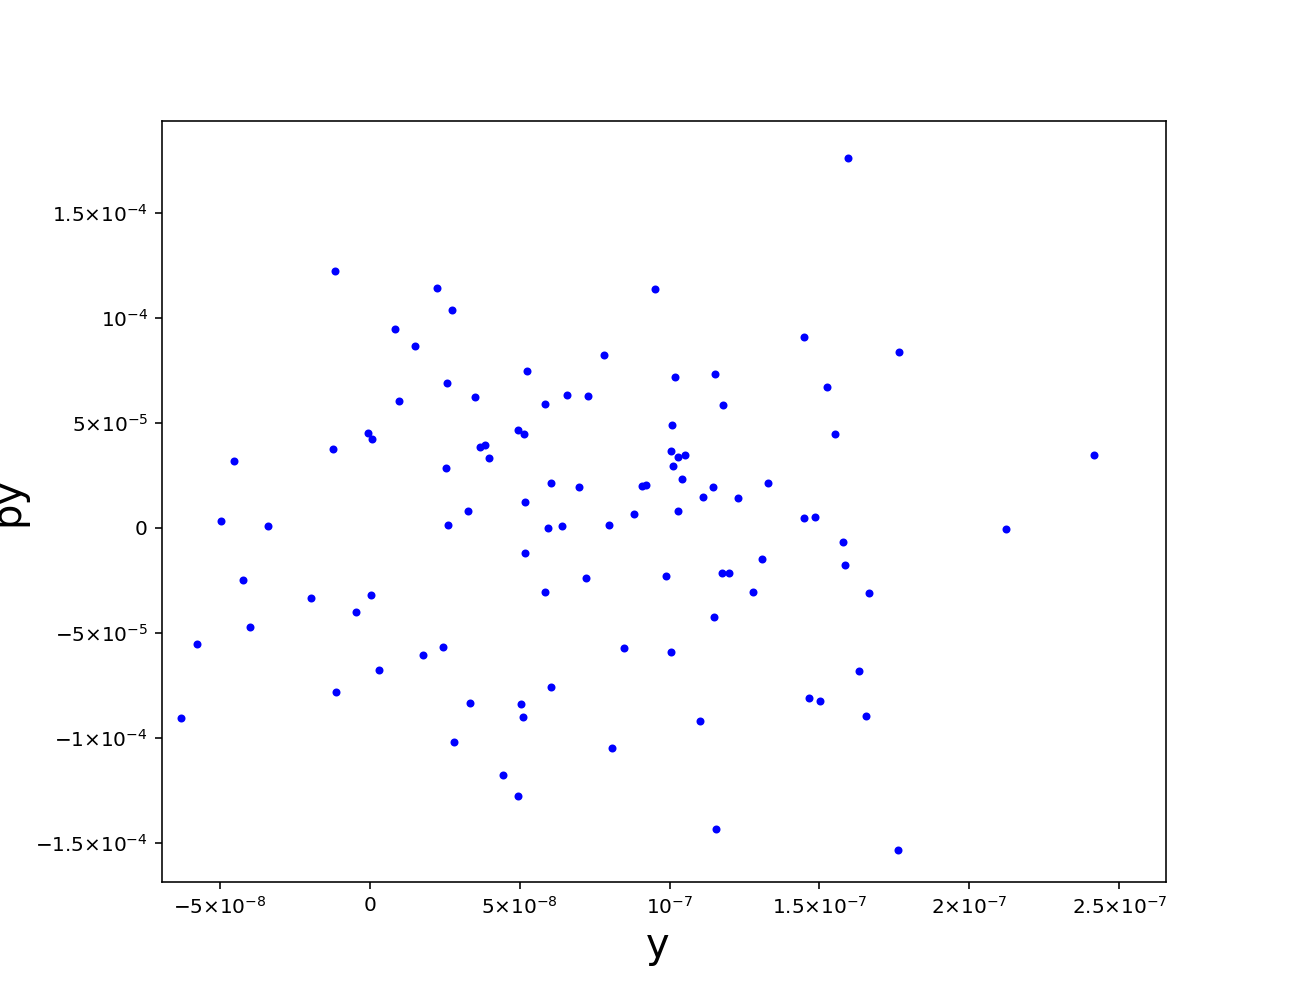

<IPython.core.display.Javascript object>


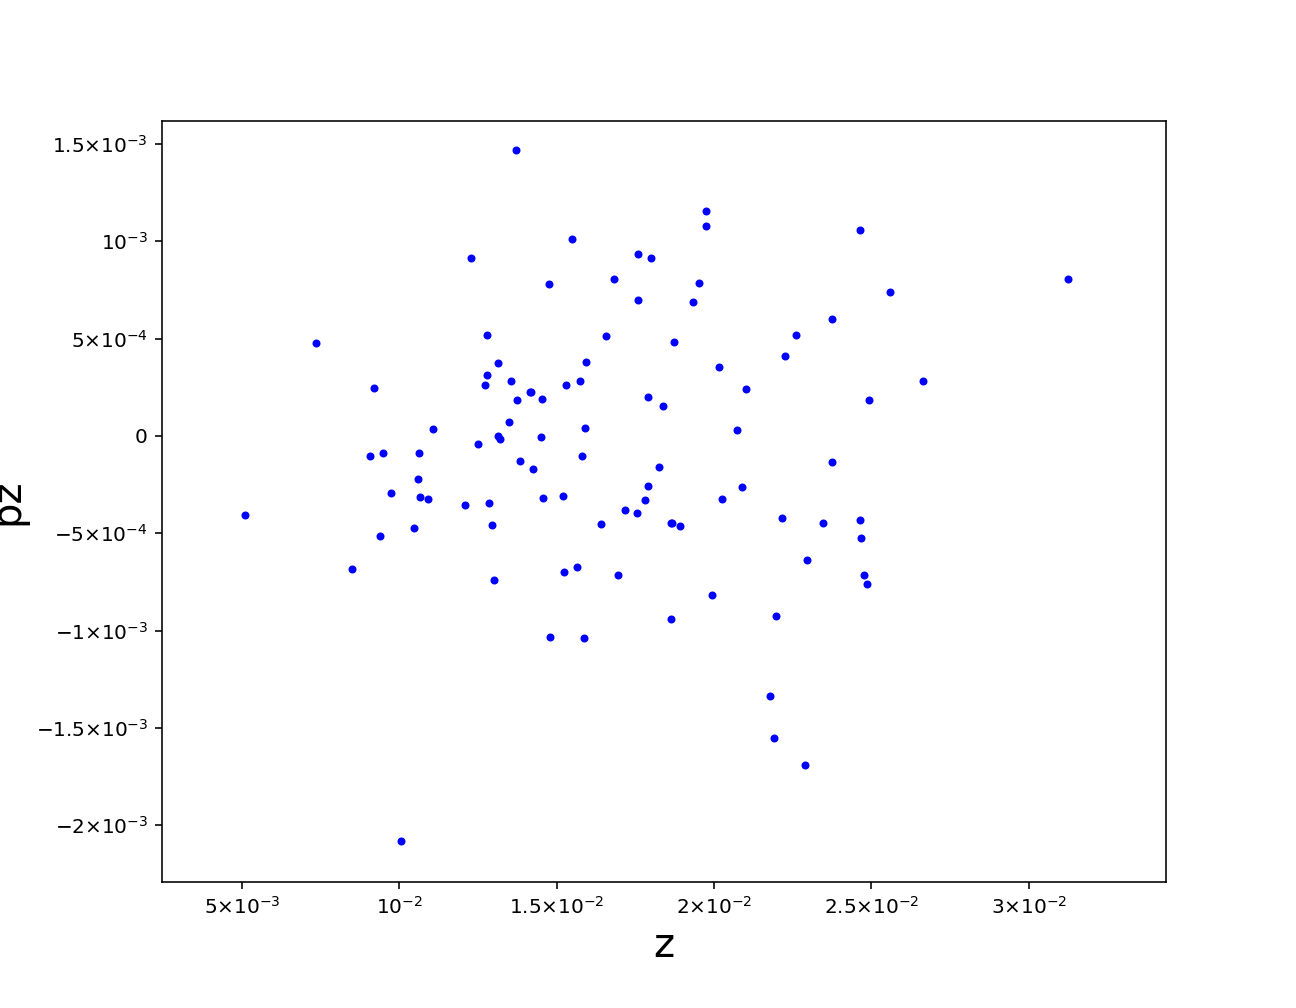

number of alive particles: 100 / 100
 
 
<x>= 1.762361872523e-05 
sig_x= 1.7146870712095603e-05 
<px>= -1.925714826000072e-07 
sig_px= 0.00028518325364293077 
 
 
<y >= 7.235062474428998e-08 
sig_y = 6.312299231067383e-08 
<py>= 1.969941862229999e-06 
sig_py= 6.364927036828585e-05 
 
 
<z>= 0.016593961928699986 
sig_z= 0.0051389199997840754 
<pz>= -4.9062324969610024e-05 
sig_pz= 0.0006404239997015944 
 
 
<sx>= 0.0 
<sy>= 0.0 
<sz>= 1.0 


<IPython.core.display.Javascript object>


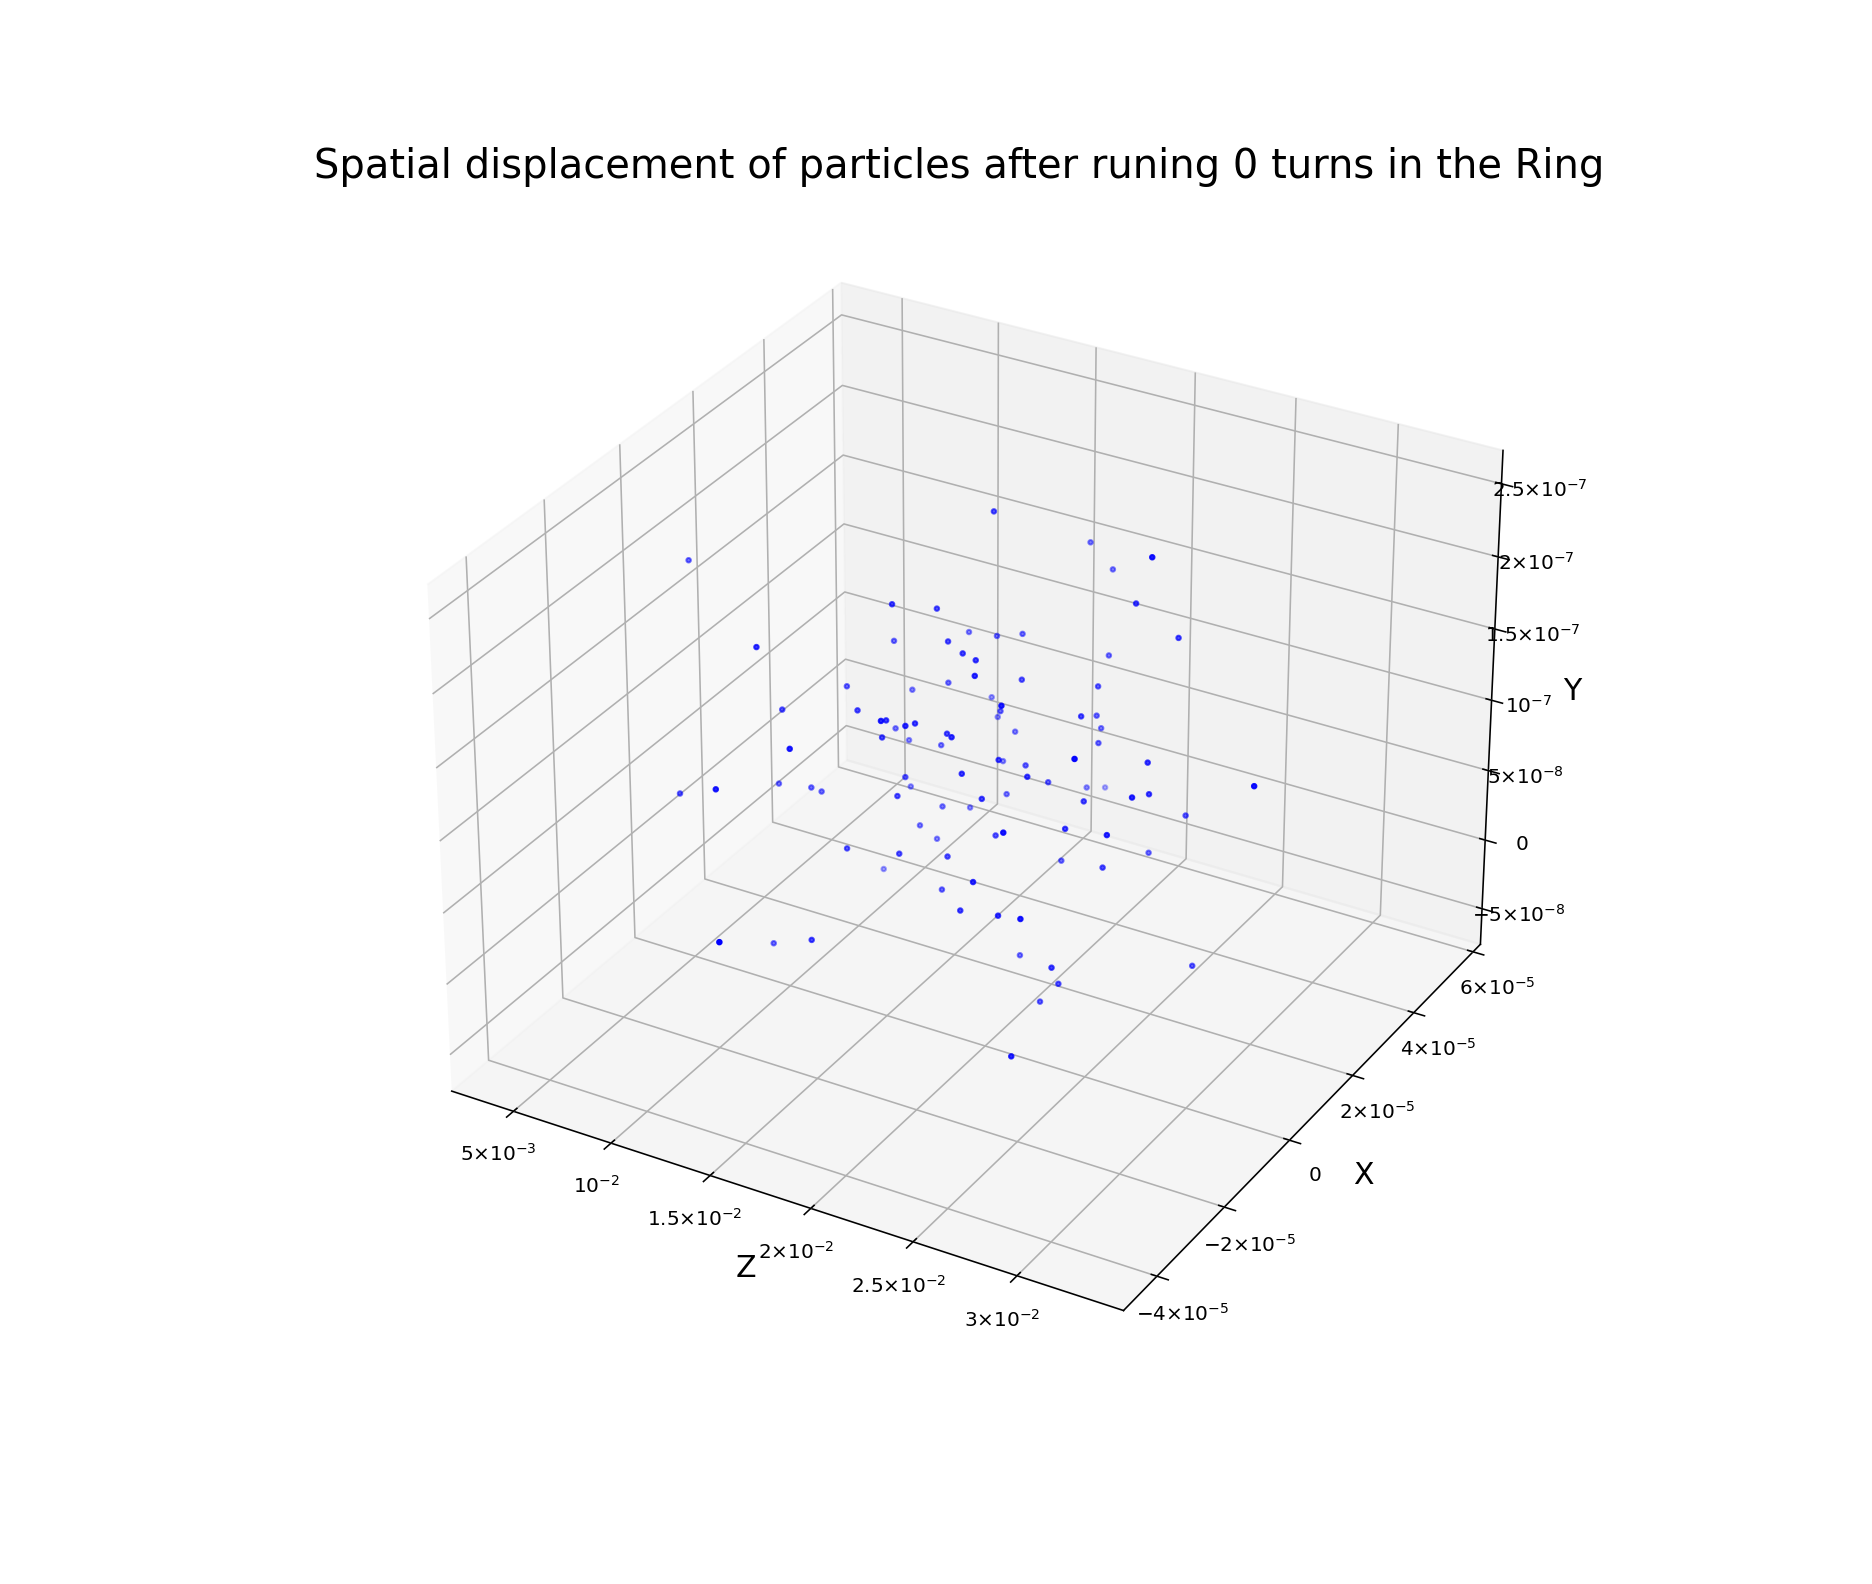

In [18]:
tp('rot-100-0.txt',0 ,100) 